## Linear Regression Models

In [1]:
import matplotlib.pyplot as plt
#% matplotlib inline
import numpy as np
np.random.seed(42)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [3]:
from sklearn.model_selection import cross_val_score

## 1. Linear Regression with Randomly Generated Data

- Generate random data for X and y and plot it
- Concatenate $x0=1$ to X, representing the bias term
- Find the best coefficient values using mathematical closed form solution
- Predict the y value for new data points of `[0]` and `[2]`
- Fit a prediction line to the previously generated random data set
- Find the coefficients and the prediction for the same new data points when using `scikitlearn`'s 

In [4]:
X=2*np.random.randn(100,1)

In [5]:
randnoise=np.random.randn(100,1)

In [6]:
y=4+3*X+randnoise

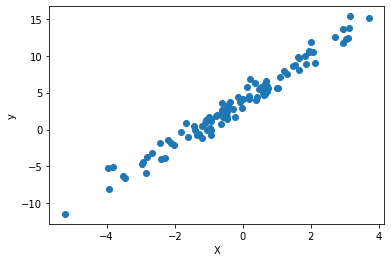

In [7]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
#y=w0+w1*X
#y=[w0 w1][1 X]T

In [9]:
X.shape

(100, 1)

In [10]:
ones=np.ones((100,1))

In [11]:
XAll=np.concatenate((np.ones((100,1)),X),axis=1)

In [12]:
#w=(XX^T)^-1*X*yi
np.linalg.inv(XAll.T.dot(XAll)).dot(XAll.T).dot(y)

array([[4.00742783],
       [2.92837142]])

In [13]:
#sample
np.array([[1],[2],[3]]).T.dot(np.array([[1],[2],[3]]))

array([[14]])

In [14]:
[1, X[0][0]]

[1, 0.9934283060224653]

In [15]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [16]:
lr.coef_,lr.intercept_

(array([[2.92837142]]), array([4.00742783]))

## 2. Polynomial Features

In [17]:
#2+1x+0.4x^2
Xp=-3+6*np.random.randn(200,1)

In [18]:
yp=2+Xp+0.4*Xp**2+np.random.randn(200,1)

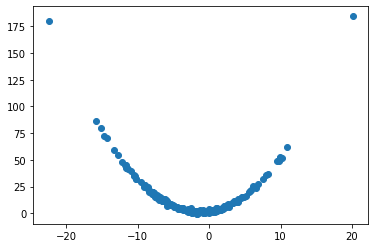

In [19]:
plt.scatter(Xp,yp)
#plt.axis([-3,3,0,10])

(-3.0, 3.0, 0.0, 10.0)

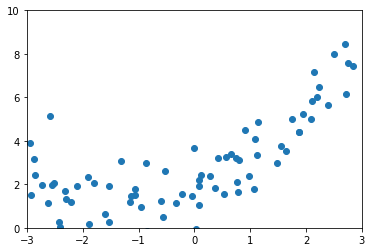

In [20]:
plt.scatter(Xp,yp)
plt.axis([-3,3,0,10])

In [21]:
#y=w0+w1x+w2*x^2
#y=[w0 w1 w2]*[1 x x^2].T

In [22]:
lr2=LinearRegression()
lr2.fit(Xp,yp)
print((lr2.intercept_,lr2.coef_))

(array([14.40160596]), array([[-0.58581333]]))


In [23]:
Xp2=np.concatenate((Xp,Xp**2),axis=1)

In [24]:
Xp.shape,Xp2.shape

((200, 1), (200, 2))

In [25]:
lr3=LinearRegression()
lr3.fit(Xp2,yp)
print((lr3.intercept_,lr3.coef_))

(array([1.86354397]), array([[0.99922552, 0.4011901 ]]))


In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [28]:
poly.fit(Xp)

PolynomialFeatures(include_bias=False)

In [33]:
poly.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [29]:
Xp3=poly.transform(Xp)

In [30]:
Xp3.shape

(200, 2)

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe1=Pipeline(steps=[('poly',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr4',LinearRegression())])

In [40]:
pipe1.fit(Xp,yp)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr4', LinearRegression())])

In [45]:
pipe1[1].intercept_,pipe1[1].coef_

(array([1.86354397]), array([[0.99922552, 0.4011901 ]]))

- Generate random data for X and y and plot it. this time, y will be a function of a polynomial.
- Transform the feature set using `PolynomialFeatures`
- Fit LinearRegression model to the transformed data
- Fit the data without transformation
- Plot the prediction lines for both polynomial regression and linear regression. Observe which one fits better to the dataset


## 3. Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model